In [1]:
!pip install shapely geopandas folium

In [1]:
import shapely
import geopandas as gpd
import folium
import matplotlib.pyplot as plt


  a) Geopandas: 

  GeoPandas is an open-source Python library that extends the capabilities of the Pandas library to handle spatial data seamlessly. It provides an easy-to-use, high-level interface for working with geospatial vector data, such as points, lines, and polygons. GeoPandas combines the data manipulation capabilities of Pandas with spatial operations from libraries like Shapely and Fiona, allowing users to read, write, analyze, and visualize geospatial datasets effortlessly within the familiar Pandas DataFrame structure.

  b) Shapely: 

  Shapely is a Python library for the manipulation and analysis of geometric objects in the Cartesian plane. Developed primarily for handling geometric operations in geospatial data science, Shapely provides a set of intuitive and efficient tools for working with points, lines, and polygons.

  c) Folium: 

  Folium is to GeoPandas what matplotlib is to Pandas. Leveraging the Leaflet.js library, Folium allows users to embed maps with various layers, markers, pop-ups, and other interactive elements directly into their Python code.

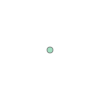

In [2]:
lat,lng = 24.847110,67.033083
point = shapely.geometry.Point(lng,lat)
point

In [3]:
type(point)

shapely.geometry.point.Point

In [4]:
list(point.coords)

[(67.033083, 24.84711)]

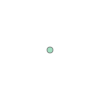

In [5]:
lat2,lng2 = 24.846391, 67.032658
point2 = shapely.geometry.Point(lng2,lat2)
point2

In [6]:
dist = point.distance(point2)
print(f"Distance between the points is {dist} units")

Distance between the points is 0.0008352161396944797 units


Shapely geometries are, by design, agnostic (unaware) of the reference system used to represent them. Distances and surface area calculated using the built-in shapely methods will always: a) assume a flat, Cartesian,
Euclidean space, and b) return the calculated value in the unit of the coordinates (e.g., meters, or degrees)

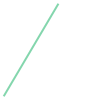

In [7]:
line = shapely.geometry.LineString([point,point2])
line

In [8]:
type(line)

shapely.geometry.linestring.LineString

In [9]:
line.length

#length of line is the same as distance between point1 and point2

0.0008352161396944797

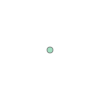

In [10]:
lat3,lng3 = 24.846760, 67.033867
point3 = shapely.geometry.Point(lng3,lat3)
point3

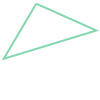

In [11]:
linear_ring = shapely.geometry.LinearRing([point,point2,point3,point])
linear_ring

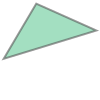

In [12]:
polygon = shapely.geometry.Polygon([point,point2,point3])
polygon

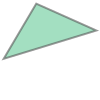

In [13]:
polygon2 = shapely.geometry.Polygon(linear_ring)
polygon2

In [14]:
polygon2 == polygon

True

## SCHOOLS IN KARACHI

In [15]:
fpath = '../data/admin_boundaries/Adminbdy Shapefile/District_Boundary.shp'
districts_gdf = gpd.read_file(fpath)

In [16]:
districts_gdf.head()

OBJECTID      PROVINCE      DISTRICT  Shape_Leng ADMIN_UNIT  Shape_Le_1  \
0         1  AZAD KASHMIR          BAGH    1.520042   DISTRICT    1.520042   
1         2  AZAD KASHMIR       BHIMBER    1.855641   DISTRICT    1.855641   
2         3  AZAD KASHMIR  HATTIAN BALA    1.383230   DISTRICT    1.383230   
3         4  AZAD KASHMIR        HAVELI    1.020584   DISTRICT    1.020584   
4         5  AZAD KASHMIR         KOTLI    1.941553   DISTRICT    1.941553   

   Shape_Le_2  Shape_Area                                           geometry  
0    1.520042    0.066329  POLYGON ((73.59197 34.07471, 73.61848 34.06234...  
1    1.855641    0.115509  POLYGON ((73.97469 33.24033, 73.97911 33.23415...  
2    1.383230    0.070850  POLYGON ((73.93623 34.33960, 73.93853 34.33269...  
3    1.020584    0.052888  POLYGON ((74.16884 34.03866, 74.18113 34.02561...  
4    1.941553    0.156810  POLYGON ((73.72720 33.58770, 73.74046 33.58151...

In [21]:
districts_gdf.crs

<Geographic 3D CRS: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984 ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

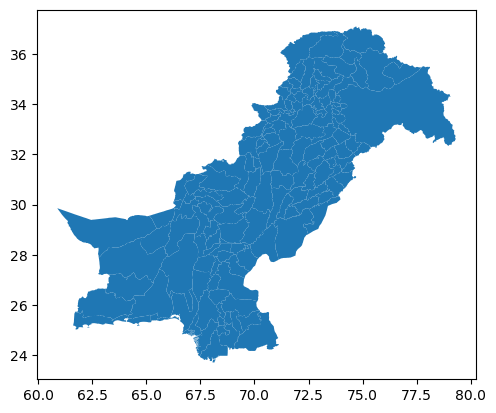

In [22]:
districts_gdf.plot()

In [23]:
districts_gdf.DISTRICT.unique()

array(['BAGH', 'BHIMBER', 'HATTIAN BALA', 'HAVELI', 'KOTLI', 'MIRPUR',
       'MUZAFFARABAD', 'NEELUM', 'POONCH', 'SUDHNOTI', 'AWARAN',
       'BARKHAN', 'CHAGAI', 'DERA BUGTI', 'GWADAR', 'HARNAI',
       'JAFFARABAD', 'JHAL MAGSI', 'KACHHI', 'KALAT', 'KECH', 'KHARAN',
       'KHUZDAR', 'KILLA ABDULLAH', 'KILLA SAIFULLAH', 'KOHLU', 'LASBELA',
       'LORALAI', 'MASTUNG', 'MUSA KHEL', 'NASIRABAD', 'NUSHKI',
       'PANJGUR', 'PISHIN', 'QUETTA', 'SHEERANI', 'SIBI', 'WASHUK',
       'ZHOB', 'ZIARAT', 'INDIAN OCCUPIED KASHMIR', 'BAJAUR AGENCY',
       'FR BANNU', 'FR D.I.KHAN', 'FR KOHAT', 'FR LAKKI MARWAT',
       'FR PESHAWAR', 'FR TANK', 'KURRAM AGENCY', 'MOHMAND AGENCY',
       'N. WAZIRASTAN', 'ORAKZAI AGENCY', 'S. WAZIRASTAN', 'ISLAMABAD',
       'ASTORE', 'DIAMIR', 'GHANCHE', 'GHIZER', 'GILGIT', 'HUNZA NAGAR',
       'SKARDU', 'ABBOTTABAD', 'BANNU', 'BATAGRAM', 'BUNER', 'CHARSADDA',
       'CHITRAL', 'D I KHAN', 'HANGU', 'HARIPUR', 'KARAK', 'KOHAT',
       'UPPER KOHISTAN', 'LAKKI M

In [24]:
karachi_districts = ['KARACHI CENTRAL', 'KARACHI WEST', 'MALIR CANTONMENT',
       'KORANGI CREEK CANTONMENT', 'MANORA CANTONMENT',
       'CLIFTON CANTONMENT', 'KARACHI CANTONMENT', 'FAISAL CANTONMENT',
       'KARACHI SOUTH', 'MALIR', 'KORANGI', 'KARACHI EAST']

khi_districts_gdf = districts_gdf[districts_gdf.DISTRICT.isin(karachi_districts)]

In [25]:
map_ = folium.Map(
    location=(lat, lng),
    zoom_start=10,
    control_scale=True
)

shapes = folium.GeoJson(
    khi_districts_gdf,
    popup=folium.features.GeoJsonPopup(fields=['DISTRICT'])
)

map_.add_child(shapes)

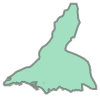

In [26]:
khi_poly = khi_districts_gdf.geometry.unary_union
khi_poly
# full list of operations here https://shapely.readthedocs.io/en/stable/manual.html

In [27]:
# convert from shaeply geometry object to GeoJson
khi_poly_geojson = khi_poly.__geo_interface__

In [28]:
map_ = folium.Map(location=(lat,lng),
                  zoom_start=10,
                  control_scale=10)

folium.GeoJson(khi_poly_geojson).add_to(map_)
map_

In [29]:
fpath = '../data/khi_schools.geojson'
khi_schools_gdf = gpd.read_file(fpath)

In [30]:
khi_schools_gdf.head()

id            @id addr:city addr:city:ar addr:city:en  \
0  way/129450655  way/129450655       NaN          NaN          NaN   
1  way/246667984  way/246667984       NaN          NaN          NaN   
2  way/391497704  way/391497704       NaN          NaN          NaN   
3  way/403601264  way/403601264   Karachi          NaN          NaN   
4  way/415682182  way/415682182       NaN          NaN          NaN   

  addr:city:ks addr:city:pnb addr:city:ps addr:city:sd addr:city:ur  ...  \
0          NaN           NaN          NaN          NaN          NaN  ...   
1          NaN           NaN          NaN          NaN          NaN  ...   
2          NaN           NaN          NaN          NaN          NaN  ...   
3          NaN           NaN          NaN          NaN          NaN  ...   
4          NaN           NaN          NaN          NaN          NaN  ...   

  school:language shop short_name traffic_signals website wheelchair wikidata  \
0             NaN  NaN        NaN             NaN     NaN        NaN      NaN   
1             NaN  NaN        NaN             NaN     NaN        NaN      NaN   
2             NaN  NaN        NaN             NaN     NaN        NaN      NaN   
3             NaN  NaN        NaN             NaN     NaN        NaN      NaN   
4             NaN  NaN        NaN             NaN     NaN        NaN      NaN   

  wikimedia_commons wikipedia  \
0               NaN       NaN   
1               NaN       NaN   
2               NaN       NaN   
3               NaN       NaN   
4               NaN       NaN   

                                            geometry  
0  POLYGON ((66.94135 24.87526, 66.94066 24.87483...  
1  POLYGON ((67.07860 24.94548, 67.07912 24.94591...  
2  POLYGON ((67.13432 24.93586, 67.13465 24.93551...  
3  POLYGON ((66.78470 24.84496, 66.78488 24.84417...  
4  POLYGON ((67.05729 24.93815, 67.05699 24.93789...  

[5 rows x 56 columns]

<Axes: >

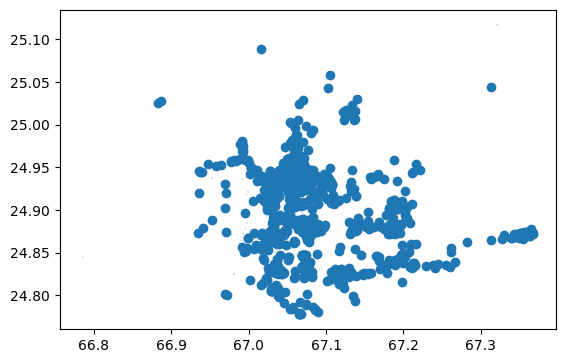

In [31]:
khi_schools_gdf.plot()

In [32]:
map_ = folium.Map(
    location=(lat, lng),
    zoom_start=20,
    control_scale=True
)

schools = folium.features.GeoJson(
    khi_schools_gdf,
    name="schools in Karachi on OSM",
    popup= folium.features.GeoJsonPopup(
        fields = ['name'],
        aliases=['Name'],
        localize=True,
        lables=True,
        style='background-color: None;'
    )

)
map_.add_child(schools)

In [33]:
khi_boundary = folium.GeoJson(khi_districts_gdf)
khi_boundary.add_to(map_)
map_

In [34]:
khi_schools_gdf = khi_schools_gdf[['id','name','geometry']]
khi_schools_gdf['type'] = khi_schools_gdf['id'].apply(lambda x: x.split('/')[0])
khi_schools_gdf.head()

C:\Users\Hisham.sajid\AppData\Local\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


id                          name  \
0  way/129450655               Base Montessori   
1  way/246667984       Ibrahim Ali Bhai School   
2  way/391497704  Govt. Girls Secondary School   
3  way/403601264                        KaNuPP   
4  way/415682182             Government School   

                                            geometry type  
0  POLYGON ((66.94135 24.87526, 66.94066 24.87483...  way  
1  POLYGON ((67.07860 24.94548, 67.07912 24.94591...  way  
2  POLYGON ((67.13432 24.93586, 67.13465 24.93551...  way  
3  POLYGON ((66.78470 24.84496, 66.78488 24.84417...  way  
4  POLYGON ((67.05729 24.93815, 67.05699 24.93789...  way

In [35]:
khi_schools_gdf.type.value_counts()

Point      844
Polygon    225
dtype: int64

In [36]:
khi_schools_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
khi_districts_gdf.crs

<Geographic 3D CRS: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984 ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
# Since both datasets have the same CRS we can do spatial join or other geometric opeartions
schools_in_districts_gdf = gpd.sjoin(left_df=khi_districts_gdf,right_df=khi_schools_gdf,predicate='contains')


C:\Users\Hisham.sajid\AppData\Local\Temp\ipykernel_17532\26448258.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984 ...
Right CRS: EPSG:4326

  schools_in_districts_gdf = gpd.sjoin(left_df=khi_districts_gdf,right_df=khi_schools_gdf,predicate='contains')


In [39]:
len(khi_schools_gdf),len(schools_in_districts_gdf)
# only 3 schools not mapped

(1069, 1065)

In [40]:
# get count of schools by district
school_count_df = schools_in_districts_gdf[['DISTRICT','id']]\
    .groupby(by=['DISTRICT'],as_index=False)\
    .agg('count')\
    .rename(columns={'id':'school_count'})\
    .sort_values(by='school_count',ascending=False)
school_count_df

DISTRICT  school_count
3            KARACHI CENTRAL           284
5              KARACHI SOUTH           249
4               KARACHI EAST           126
7                    KORANGI           125
9                      MALIR           103
6               KARACHI WEST            77
0         CLIFTON CANTONMENT            49
10          MALIR CANTONMENT            19
8   KORANGI CREEK CANTONMENT            11
1          FAISAL CANTONMENT            10
2         KARACHI CANTONMENT             9
11         MANORA CANTONMENT             3

In [41]:
khi_districts_gdf = khi_districts_gdf.merge(school_count_df,on='DISTRICT',how='left')

In [42]:
map_ = folium.Map(
    location=(lat, lng),
    zoom_start=10,
    control_scale=True
)

folium.Choropleth(
    geo_data=khi_districts_gdf,
    name='choropleth',
    data=khi_districts_gdf,
    columns=['DISTRICT','school_count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Schools in Karachi by District',

).add_to(map_)

count_layer = folium.GeoJson(
    khi_districts_gdf,
    name="count_layer",
    highlight_function=lambda x: {"color":"red","weight": 0.0, "fillOpacity": 0.2},
    tooltip=folium.features.GeoJsonTooltip(fields=["DISTRICT","school_count"], aliases=["District: ","Schools: "]),
).add_to(map_)



map_
